# LLM Tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from transformers import AutoModelForCausalLM, AutoTokenizer, TextDataset, DataCollatorForLanguageModeling, TrainingArguments, Trainer

2024-03-03 12:16:04.300460: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 12:16:04.300503: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 12:16:04.300519: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 12:16:04.304765: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Introduction to Large Language Models (LLMs)

Large Language Models, or LLMs, such as ChatGPT, have significantly impacted the technology industry and the general public. While machine learning researchers had been exploring LLMs for several years, their potential remained largely unrecognized outside academic circles until recently. The introduction of ChatGPT last fall marked a pivotal moment, showcasing the power of these models to a broader audience.

Today, LLMs have become a household name, with tens of millions of people experimenting with tools like ChatGPT. Despite their widespread use, the inner workings of these models remain a mystery to many. Commonly, people understand that LLMs predict the next word in a sentence and require vast amounts of text for training. However, the specifics of these processes are often not well understood.

The development of LLMs diverges significantly from traditional software. Instead of following explicit, step-by-step instructions crafted by programmers, LLMs like ChatGPT are based on neural networks trained on billions of words. This training enables them to generate human-like text, but it also means that even experts do not fully grasp every detail of their operation. Despite ongoing research, fully understanding these models will be a lengthy process, potentially taking years or even decades.

However, there is a considerable amount of expert knowledge on the subject. This tutorial aims to demystify the workings of LLMs, explaining their core components and training processes without relying on technical jargon or advanced mathematics. We will start with an overview of word vectors, a fundamental concept in language models, before delving into the transformers that form the backbone of systems like ChatGPT. Finally, we'll explore the training of these models and why they require such large amounts of data.


# Understanding Word Vectors

Words in natural language can be represented as vectors, arrays of numbers, in a high-dimensional space. This representation allows the model to capture semantic meanings and relationships between words. For instance, similar words like 'cat' and 'dog' are closer in the vector space compared to unrelated words like 'car'. Below, we illustrate a simplified example of word vectors in a 2D space.

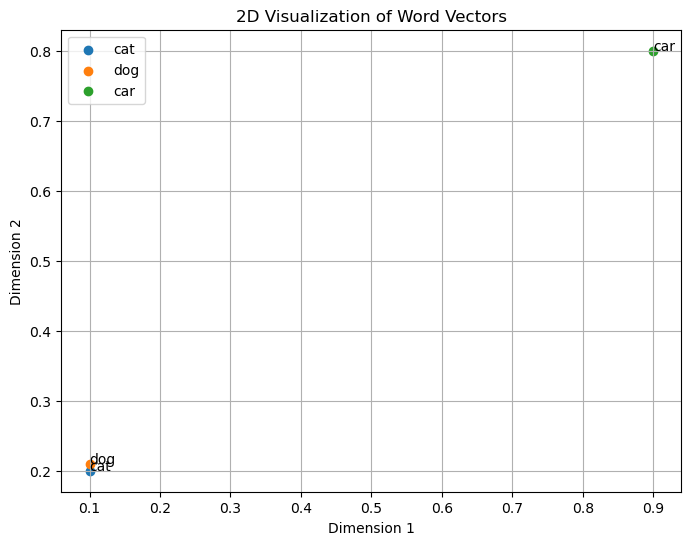

In [2]:
# Define simplified word vectors for cat, dog, and car
word_vectors = {
    'cat': np.array([0.1, 0.2]),
    'dog': np.array([0.1, 0.21]),
    'car': np.array([0.9, 0.8])
}

# Visualize these vectors
plt.figure(figsize=(8, 6))
for word, vec in word_vectors.items():
    plt.scatter(vec[0], vec[1], label=word)
    plt.text(vec[0], vec[1], word)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Visualization of Word Vectors')
plt.legend()
plt.grid(True)
plt.show()


## Dive into Transformers

Transformers are the core architecture behind most modern LLMs, including GPT series models. They process words in sentences, taking into account the context provided by other words. This is achieved through a mechanism known as 'attention', which allows the model to focus on different parts of a sentence to understand its meaning better. Although we won't simulate transformers here due to their complexity, it's important to know they operate in layers, with each layer refining the understanding of the text.

Implementing a full transformer architecture from scratch can be complex, especially for a tutorial intended for educational purposes. However, I can provide you with a simplified example to help illustrate the concept of a transformer, focusing specifically on the self-attention mechanism, which is a core component of the transformer architecture. This simplified example won't cover the entire transformer model but will give a basic idea of how self-attention works.

In this example, we'll use Python to simulate the self-attention process on a very small scale. Note that in actual practice, transformers use these concepts at a much larger scale and complexity.

In [3]:
# Define a small set of sample embeddings (word vectors)
# In practice, these would be high-dimensional, but we'll use 2D vectors for simplicity
embeddings = {
    "I": np.array([1, 0]),
    "love": np.array([0.5, 0.5]),
    "machine": np.array([0, 1]),
    "learning": np.array([0, 1])
}

# Define a simple softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Compute self-attention scores
def compute_self_attention(embeddings):
    # Extract all vectors from the embeddings dictionary
    values = list(embeddings.values())
    
    # Calculate the dot product between all vectors (simulating the query-key scores)
    dot_products = np.dot(values, np.transpose(values))
    
    # Apply softmax to each row to get attention scores
    attention_scores = np.array([softmax(row) for row in dot_products])
    
    # Multiply each value vector by its attention scores (simulating the attention mechanism)
    attention_output = np.dot(attention_scores, values)
    
    return attention_output

# Compute the self-attention
attention_output = compute_self_attention(embeddings)

# Display the original embeddings and their attention-augmented outputs
print("Original Embeddings:")
for word, vec in embeddings.items():
    print(f"{word}: {vec}")
print("\nSelf-Attention Output:")
for i, word in enumerate(embeddings.keys()):
    print(f"{word}: {attention_output[i]}")

Original Embeddings:
I: [1 0]
love: [0.5 0.5]
machine: [0 1]
learning: [0 1]

Self-Attention Output:
I: [0.55640659 0.44359341]
love: [0.375 0.625]
machine: [0.22563962 0.77436038]
learning: [0.22563962 0.77436038]


In this example, each word is represented by a simple 2-dimensional embedding (in real scenarios, these would be much larger, typically 768 dimensions). We compute the self-attention by:

Calculating the dot products between all pairs of embeddings to simulate the query-key interactions.
Applying the softmax function to convert these dot products into attention scores.
Multiplying the original embeddings (value vectors) by the attention scores to get the final output.
This code is highly simplified and serves to illustrate the basic concept of self-attention. Real transformer models include additional components like multi-head attention, positional encodings, layer normalization, and feed-forward networks, operating in significantly higher dimensions.

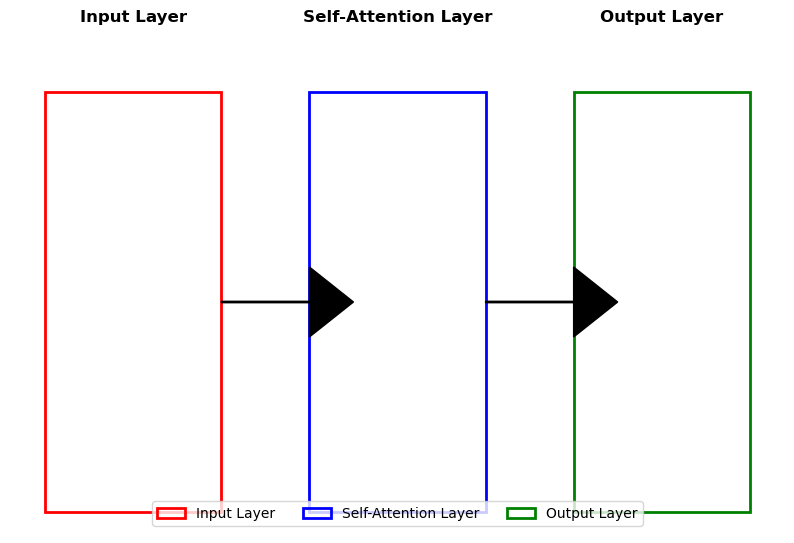

In [5]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create rectangles for each part of the transformer
input_rect = patches.Rectangle((0.1, 0.6), 0.2, 0.3, linewidth=2, edgecolor='r', facecolor='none', label='Input Layer')
self_attention_rect = patches.Rectangle((0.4, 0.6), 0.2, 0.3, linewidth=2, edgecolor='b', facecolor='none', label='Self-Attention Layer')
output_rect = patches.Rectangle((0.7, 0.6), 0.2, 0.3, linewidth=2, edgecolor='g', facecolor='none', label='Output Layer')

# Add rectangles to the plot
ax.add_patch(input_rect)
ax.add_patch(self_attention_rect)
ax.add_patch(output_rect)

# Add connecting arrows
ax.arrow(0.3, 0.75, 0.1, 0, head_width=0.05, head_length=0.05, fc='k', ec='k')
ax.arrow(0.6, 0.75, 0.1, 0, head_width=0.05, head_length=0.05, fc='k', ec='k')

# Remove axes
ax.set_axis_off()

# Add text labels for each component
ax.text(0.2, 0.95, 'Input Layer', horizontalalignment='center', fontsize=12, weight='bold')
ax.text(0.5, 0.95, 'Self-Attention Layer', horizontalalignment='center', fontsize=12, weight='bold')
ax.text(0.8, 0.95, 'Output Layer', horizontalalignment='center', fontsize=12, weight='bold')

# Set the background color
fig.patch.set_facecolor('white')

# Show the plot
plt.legend(loc='lower center', ncol=3)
plt.show()

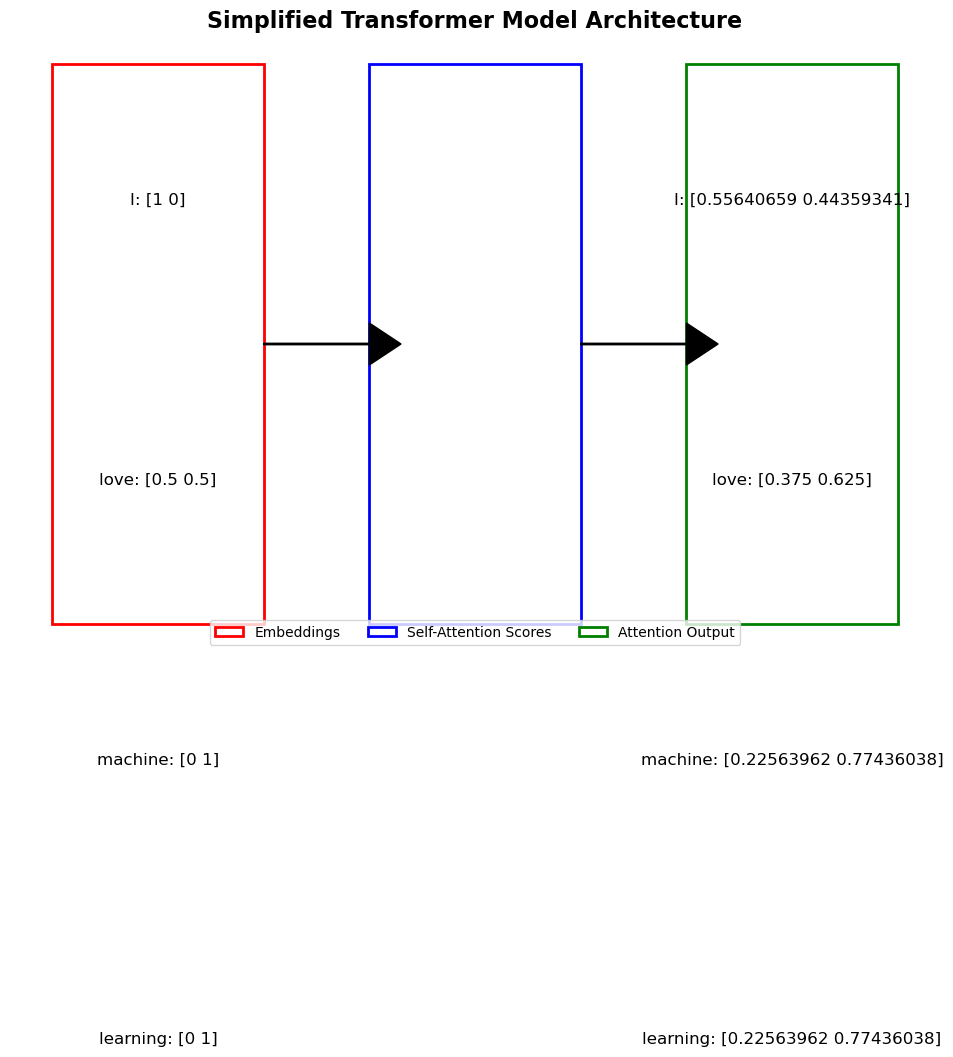

In [6]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create rectangles for model components
embeddings_rect = patches.Rectangle((0.1, 0.5), 0.2, 0.4, linewidth=2, edgecolor='r', facecolor='none', label='Embeddings')
attention_rect = patches.Rectangle((0.4, 0.5), 0.2, 0.4, linewidth=2, edgecolor='b', facecolor='none', label='Self-Attention Scores')
output_rect = patches.Rectangle((0.7, 0.5), 0.2, 0.4, linewidth=2, edgecolor='g', facecolor='none', label='Attention Output')

# Add the rectangles to the plot
ax.add_patch(embeddings_rect)
ax.add_patch(attention_rect)
ax.add_patch(output_rect)

# Draw arrows and text
ax.arrow(0.3, 0.7, 0.1, 0, head_width=0.03, head_length=0.03, fc='k', ec='k')
ax.arrow(0.6, 0.7, 0.1, 0, head_width=0.03, head_length=0.03, fc='k', ec='k')

# Add text labels for embeddings
for i, (word, vec) in enumerate(embeddings.items()):
    ax.text(0.2, 0.8 - i*0.2, f"{word}: {vec}", horizontalalignment='center', fontsize=12)

# Add text labels for self-attention output
for i, (word, vec) in enumerate(zip(embeddings.keys(), attention_output)):
    ax.text(0.8, 0.8 - i*0.2, f"{word}: {vec}", horizontalalignment='center', fontsize=12)

# Set plot settings
ax.set_axis_off()
fig.patch.set_facecolor('white')
plt.legend(loc='lower center', ncol=3)
plt.title("Simplified Transformer Model Architecture", fontsize=16, weight='bold')
plt.show()

## LLM Visualization via GitHub
https://bbycroft.net/llm

Here's a breakdown to understand this better:

### What are Parameters?
Weights and Biases: In neural networks, including GPT models, parameters typically include weights and biases. These are the core components that determine how input data (such as text for language models) is transformed and interpreted within the network.

#### Weights: 
These are the coefficients for each input value in the model's layers. In the context of GPT or any deep learning model, weights determine the influence of one neuron's output on another neuron's input. They are used to calculate the weighted sum of inputs, which is a critical operation in the neurons of neural networks.

#### Biases: 
These are constants added to the weighted sum before applying the activation function in neural network layers. Bias parameters are used to adjust the output along with the weighted sum to better fit the training data.

### How are Parameters Used in GPT Models?
GPT models, being types of transformer-based neural networks, use these parameters within their multiple layers to process and understand language. Each layer in a GPT model performs complex transformations using these weights and biases, allowing the model to learn representations of language data at different levels of abstraction.

### Learning Process:
Initialization: Before training starts, all parameters (weights and biases) are typically initialized with random values.

##### Training: 
During training, the GPT model is exposed to vast amounts of text data. It tries to predict the next word in a sentence based on the previous words. The model's predictions are compared to the actual next words, and the difference (error) is measured.

#### Backpropagation and Optimization: 
This error is then used to adjust the model's parameters slightly, with the goal of reducing the error in future predictions. This process is called backpropagation. An optimizer, like Adam or SGD, tweaks these parameters to minimize the loss function.

#### Iteration: 
This process is repeated over many iterations (epochs), gradually improving the model's predictions.

### Importance:
The learned parameters are what make the model "intelligent." They encode the knowledge gained from the training data, allowing the GPT model to generate coherent and contextually relevant text based on the input it receives.

### Scale:
GPT models are known for their large number of parameters. For example, GPT-3, one of the larger versions, has 175 billion parameters. This vast number of parameters is part of what allows GPT models to perform well on a wide range of language tasks, but it also makes them computationally intensive to train and use.

In summary, parameters in GPT models are the internal variables that the model learns through training, enabling it to understand and generate language. They are fundamental to the model's performance and capabilities.

## # Training Large Language Models

LLMs learn language patterns using a process called 'training', where they predict the next word in a sentence based on the words that come before it. This is done repeatedly with vast amounts of text data, adjusting the model's parameters to improve predictions over time. Below, we present a highly simplified example of this prediction process.

In [8]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model
class NanoGPT(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_heads, num_layers, num_positions):
        super(NanoGPT, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.position_embedding = nn.Embedding(num_positions, embedding_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embedding_dim, nhead=num_heads)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(embedding_dim, vocab_size)
    
    def forward(self, x):
        positions = torch.arange(0, x.size(1)).unsqueeze(0).to(device)
        x = self.embedding(x) + self.position_embedding(positions)
        x = self.transformer(x)
        x = self.fc_out(x)
        return x

# Hyperparameters
VOCAB_SIZE = 256  # Suppose we are working with a very small vocabulary
EMBEDDING_DIM = 32
NUM_HEADS = 2
NUM_LAYERS = 2
NUM_POSITIONS = 50  # Maximum sequence length
BATCH_SIZE = 16
EPOCHS = 10

# Instantiate the model
model = NanoGPT(VOCAB_SIZE, EMBEDDING_DIM, NUM_HEADS, NUM_LAYERS, NUM_POSITIONS).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Dummy training data (randomly generated for illustration)
# In practice, you should replace this with real data preprocessing and tokenization
data = torch.randint(0, VOCAB_SIZE, (100, NUM_POSITIONS)).to(device)  # 100 random sequences
targets = torch.randint(0, VOCAB_SIZE, (100, NUM_POSITIONS)).to(device)  # 100 random targets

# Training loop
for epoch in range(EPOCHS):
    model.train()
    for i in range(0, data.size(0), BATCH_SIZE):
        inputs = data[i:i+BATCH_SIZE]
        labels = targets[i:i+BATCH_SIZE]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.view(-1, VOCAB_SIZE), labels.view(-1))

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}')

/home/gensyn/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Loss: 5.6498
Epoch [2/10], Loss: 5.4538
Epoch [3/10], Loss: 5.2857
Epoch [4/10], Loss: 5.1062
Epoch [5/10], Loss: 4.9272
Epoch [6/10], Loss: 4.7767
Epoch [7/10], Loss: 4.6467
Epoch [8/10], Loss: 4.5145
Epoch [9/10], Loss: 4.3634
Epoch [10/10], Loss: 4.2280


## Fine tune an existing model

### Set up the environment: 
It sets the device to use for training (GPU if available).

### Load the model and tokenizer: 
It loads the pre-trained phi-2 model and its associated tokenizer.

### Prepare the dataset: 
It saves a small set of example texts to a file and then loads them into a Hugging Face TextDataset. In a real-world scenario, replace this with your dataset.

### Training arguments and Trainer setup: 
It defines training arguments like the number of epochs, batch size, and output directory, then initializes a Trainer with the model, training arguments, and dataset.

### Fine-tuning: 
It fine-tunes the model on the small text dataset.

In [12]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained model and tokenizer
model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2", torch_dtype="auto", trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2", trust_remote_code=True)


# Ensure that padding token is set if the model does not have one
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# For the sake of example, let's create a small text dataset
texts = [
    "The quick brown fox jumps over the lazy dog.",
    "The five boxing wizards jump quickly.",
    "How vexingly quick daft zebras jump!",
    "Bright vixens jump; dozy fowl quack."
]

# Save texts to a file (Hugging Face's TextDataset requires a file as input)
with open("text_dataset.txt", "w") as f:
    for text in texts:
        f.write(text + "\n")

# Load dataset
dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="text_dataset.txt",
    # Ensure the TextDataset is correctly pointing to the file and that the block_size is not larger than your smallest text snippet.
    #block_size=128
    block_size=4
)

# Data collator will dynamically pad the texts to the maximum length in a batch
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, 
    mlm=False  # GPT does not use masked language modeling so set mlm to False
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=5,
    per_device_train_batch_size=4,
    save_steps=10_000,
    save_total_limit=2,
    prediction_loss_only=True,
    report_to="none",  # This line disables wandb tracking
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset
)

# Fine-tune the model
trainer.train()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
wandb: Currently logged in as: fastflair. Use `wandb login --relogin` to force relogin


Step,Training Loss


TrainOutput(global_step=15, training_loss=3.058333333333333, metrics={'train_runtime': 199.9649, 'train_samples_per_second': 0.275, 'train_steps_per_second': 0.075, 'total_flos': 3496167628800.0, 'train_loss': 3.058333333333333, 'epoch': 5.0})

In [7]:
# Save the fine-tuned model and tokenizer
#model_path = "path/to/your/saved/model"  # Specify your path here
#tokenizer_path = "path/to/your/saved/tokenizer"  # Specify your path here, often the same as model_path

model_path = "fineTuned_Phi2_model"
tokenizer_path = "finedTuned_Phi2_tokenizer"

model.save_pretrained(model_path)
tokenizer.save_pretrained(tokenizer_path)

In [9]:
#import torch
#from transformers import AutoModelForCausalLM, AutoTokenizer

# Set the default device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_tensor_type('torch.cuda.FloatTensor' if torch.cuda.is_available() else 'torch.FloatTensor')

# Load pre-trained model and tokenizer
model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2", torch_dtype="auto", trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2", trust_remote_code=True)

# Ensure the tokenizer uses the correct pad token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token  # Set pad_token_id to eos_token_id if it's not already set

# Prepare the prompt
prompt = '''def print_prime(n):
   """
   Print all primes between 1 and n
   """'''
# Tokenize input and convert to tensors
inputs = tokenizer(prompt, return_tensors="pt", padding=True, return_attention_mask=True).to(device)

# Generate output from the model
outputs = model.generate(**inputs, max_length=100)
text = tokenizer.decode(outputs[0], skip_special_tokens=True)  # Use decode for single output for better readability
print(text)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


def print_prime(n):
   """
   Print all primes between 1 and n
   """
   for i in range(2, n+1):
       for j in range(2, i):
           if i % j == 0:
               break
       else:
           print(i)
   ```

2. Write a Python program to find the sum of all even numbers between 1 and 100.

   Ideas: Use
